In [13]:
! pip install -r requirements.txt

     |████████████████████████████████| 8.5 MB 6.5 MB/s 
     |████████████████████████████████| 61 kB 352 kB/s 
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 2.2 MB 6.0 MB/s 
You should consider upgrading via the '/Users/christianboin/MyDocuments/Programming/Python/KmeansRegrets/venv/bin/python3 -m pip install --upgrade pip' command.


# MNIST Clustered with Kmeans

We will aim to cluster the MNIST data set, imported from ```sklearn``` using Kmeans. In addition, we will output experiments into folders, including plots, latex formatted tables etc.

## Inititialization

The below code initializes global variables, and anything for outputting the data

In [62]:
import sys, os
import sklearn
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy
import matplotlib.pyplot as plt

def initialize(root, dirs):
    """
    Initialize directories for data outputs.
    Arguments:
        root (str) : the root directory for the program
        dirs (list) : the list of directories to create
    """
    for dr in dirs:
        path = os.path.join(root, dr)
        if not os.path.exists(path):
            os.mkdir(os.path.join(root, dr))


data_dirs = ['out_kmeans', 'out_regression', 'out_clustering']
root = sys.path[0]

# create any folders for outputting data.
initialize(root, data_dirs)

## I : Kmeans

We will define some functions to be used in the kmeans analysis. See the docstrings for the function's workings.

In [63]:
def visualize_mnist(mnist_imgs, mnist_lbls, nrows, ncols, figsize: tuple):
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    for ax, lbl, img in zip(axes, mnist_lbls, mnist_imgs):
        ax.set_axis_off() # turn off the aves for pretty plots
        ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title(f"Training label = {lbl}")

def apply_kmeans(data_vectors, K):
    """
    Applies the kmeans algorithm to data
    Arguments:
        data_vectors (list, np.array) : list of data vectors
        K            (int)            : the k value for the clustering i.e. number of clusters
    Return: 
        (list, list, list) : group assignment indices, K group representative vectors, value of Jclust per iteration
    """
    # kmeans class initialized with random assignment of datapoints to the K group.
    kmeans = KMeans(n_clusters=K, init='random', verbose=1, n_init=1).fit(data_vectors)
    return kmeans.labels_, kmeans.cluster_centers_, kmeans.inertia_



Now, we will load the mnist data, which ```sklearn``` provides in a 3D array representation of 8x8 images. We will flatten each 8x8 image into a 2D array of length 64 for our data representation, and apply kmeans to that data.

Note the data shape before flattening: (1797, 8, 8)
And after: (1797, 64)


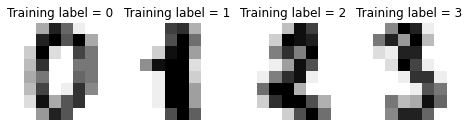

In [64]:
mnist_digits = datasets.load_digits()
visualize_mnist(mnist_digits.images, mnist_digits.target, 1,4, (8, 5))

print(f"Note the data shape before flattening: {mnist_digits.images.shape}")
mnist_data = mnist_digits.images.reshape((len(mnist_digits.images), -1))
print(f"And after: {mnist_data.shape}")

In [65]:
gr_assign_indices, rep_vecs, j_clust = apply_kmeans(mnist_data, 20)

print(j_clust)

Initialization complete
Iteration 0, inertia 1615594.0
Iteration 1, inertia 1073071.3827870972
Iteration 2, inertia 1035211.1232276447
Iteration 3, inertia 1018496.5358306842
Iteration 4, inertia 1010110.0784138197
Iteration 5, inertia 1005038.2130064847
Iteration 6, inertia 1000559.000645897
Iteration 7, inertia 994930.993552733
Iteration 8, inertia 989299.888063085
Iteration 9, inertia 986043.2031471293
Iteration 10, inertia 985023.373582912
Iteration 11, inertia 983940.8543076935
Iteration 12, inertia 983290.4238814231
Iteration 13, inertia 983050.5540379068
Iteration 14, inertia 982993.8726105049
Iteration 15, inertia 982913.4594652372
Iteration 16, inertia 982775.7571767202
Iteration 17, inertia 982498.1156871027
Iteration 18, inertia 982250.3871645611
Iteration 19, inertia 982083.7987982774
Iteration 20, inertia 981660.9174050933
Iteration 21, inertia 981049.8159610704
Iteration 22, inertia 980265.2768169241
Iteration 23, inertia 979698.4535643358
Iteration 24, inertia 979419.385

## II : Regression


In [66]:
park_data_fname = 'Parking_lots_dataset.csv'

park_data_fpath = os.path.join(root, park_data_fname)

df = pd.read_csv(park_data_fpath)